# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'491ad461c181a9d54d641a244d3bfa40'

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# # Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "&units=metric"

# # Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

   # Create endpoint URL with each city
    city_url = f"{url}{city}{units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
    # If an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | al-`ula
al-`ula not found. Skipping...
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | luanda
Processing Record 8 of Set 1 | sibay
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | burang
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | uruzgan
Processing Record 16 of Set 1 | qamdo
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | calvinia
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | sola
Processing Recor

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-7.15,63,75,3.09,CA,1698590863
1,albany,42.6001,-73.9662,7.35,91,100,2.43,US,1698590641
2,grytviken,-54.2811,-36.5092,3.22,88,48,1.98,GS,1698590865
3,jamestown,42.0970,-79.2353,7.51,98,100,4.12,US,1698590664
4,ribeira grande,38.5167,-28.7000,18.22,63,75,5.14,PT,1698590866


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-7.15,63,75,3.09,CA,1698590863
1,albany,42.6001,-73.9662,7.35,91,100,2.43,US,1698590641
2,grytviken,-54.2811,-36.5092,3.22,88,48,1.98,GS,1698590865
3,jamestown,42.0970,-79.2353,7.51,98,100,4.12,US,1698590664
4,ribeira grande,38.5167,-28.7000,18.22,63,75,5.14,PT,1698590866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

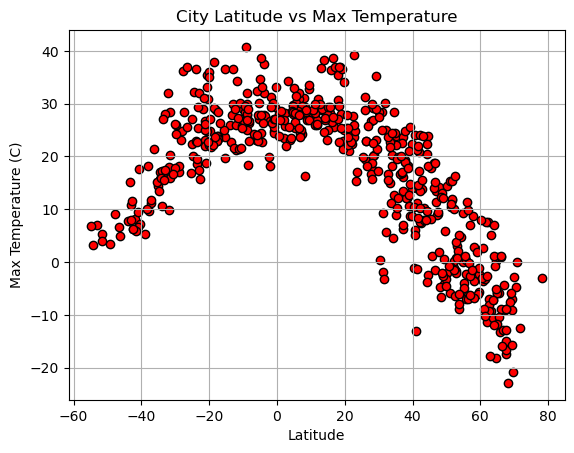

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color= "red", edgecolors="black")



# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

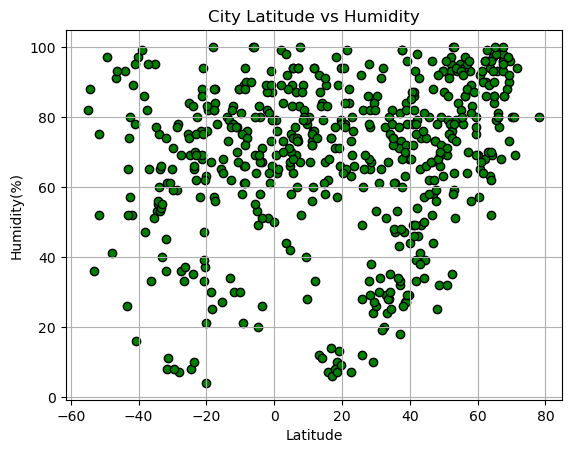

In [31]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, color="green", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs Humidity")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

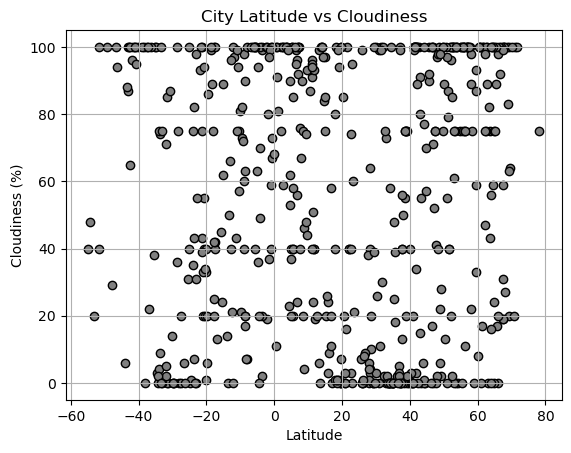

In [32]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, color="gray", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

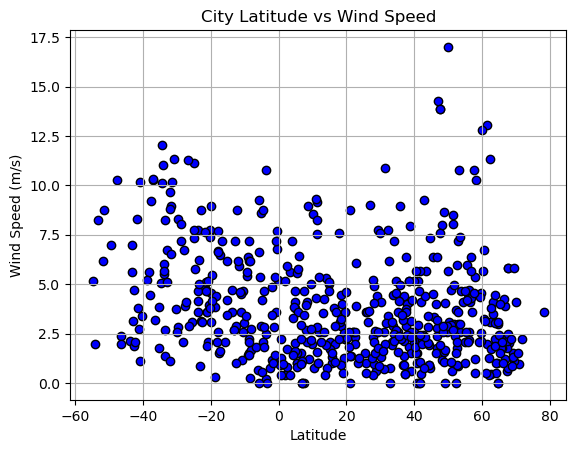

In [33]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df[city_data_df["Lat"]>= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-7.15,63,75,3.09,CA,1698590863
1,albany,42.6001,-73.9662,7.35,91,100,2.43,US,1698590641
3,jamestown,42.0970,-79.2353,7.51,98,100,4.12,US,1698590664
4,ribeira grande,38.5167,-28.7000,18.22,63,75,5.14,PT,1698590866
6,sibay,52.7181,58.6658,0.68,100,100,1.79,RU,1698590867


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,3.22,88,48,1.98,GS,1698590865
5,luanda,-8.8368,13.2343,30.00,66,40,7.20,AO,1698590867
10,port-aux-francais,-49.3500,70.2167,3.33,97,100,6.99,TF,1698590869
12,papatowai,-46.5619,169.4708,6.56,91,100,2.38,NZ,1698590363
18,calvinia,-31.4707,19.7760,20.19,11,0,10.15,ZA,1698590874


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7531142870112127


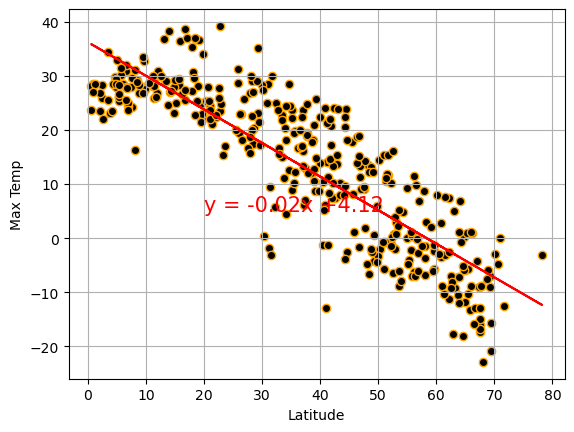

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "black", edgecolors="orange")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.5398669807994293


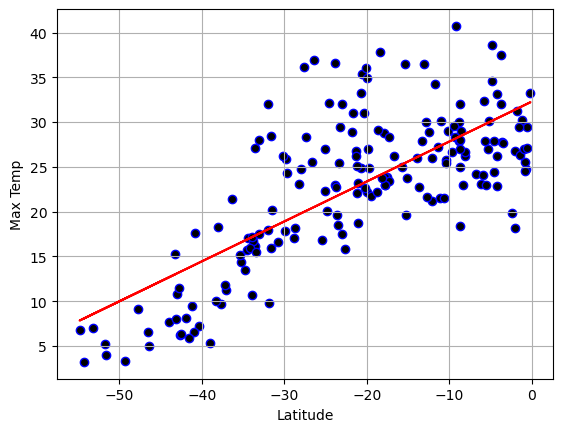

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "black", edgecolors="blue")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:
As expected, as one moves further away from the equator in either direction (North or South) there is a direct relationship to a decrease in max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0474635564441016


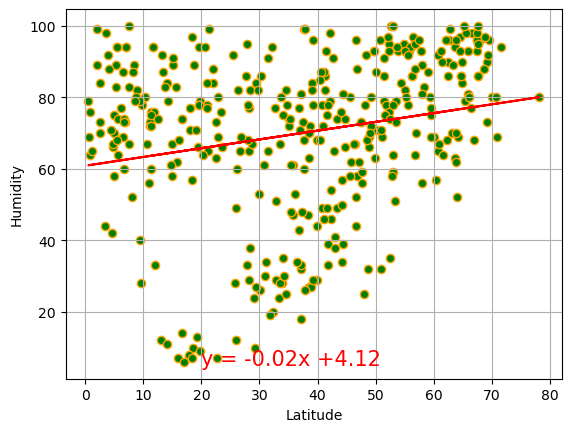

In [39]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "green", edgecolors="orange")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

The r-value is: 0.008119857249245443


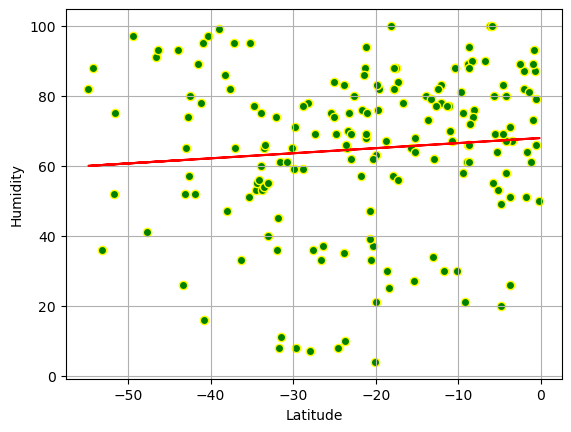

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "green", edgecolors="yellow")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** 
There is a sight increase in the humidity in the northern hemisphere as one gets further from the equator, but it is not statistically significant with an r-value of < 0.05. In the southern hemisphere the relationship is even less. One can safely conclude there is no statistical relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009233668151574633


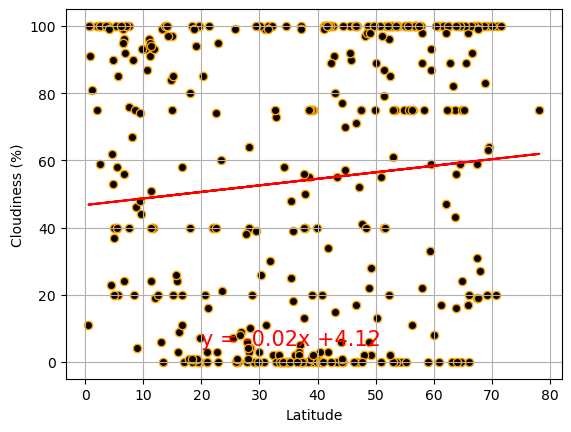

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "black", edgecolors="orange")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

The r-value is: 0.009233668151574633


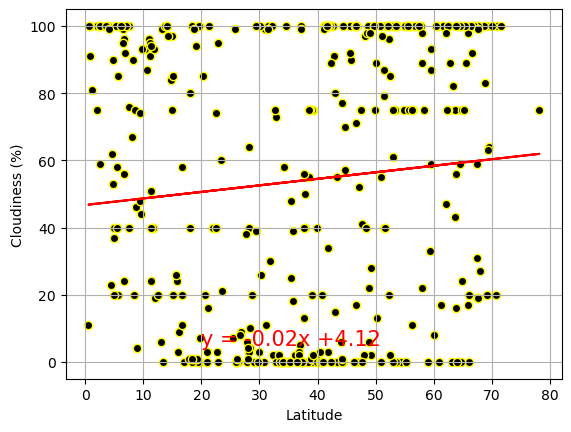

In [42]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "black", edgecolors="yellow")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** 
Both northern and southern hemispheres have plot points all over the map, and r-values that are well below 0.05, therefore one can conclude there is no relationship between latitude and cloudiness for a city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004057682336046672


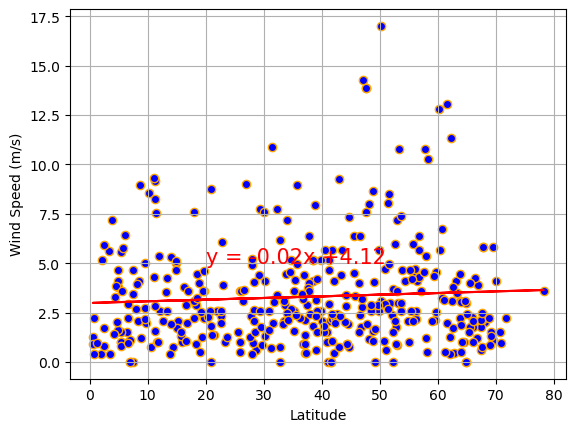

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "blue", edgecolors="orange")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

The r-value is: 0.07064208801519078


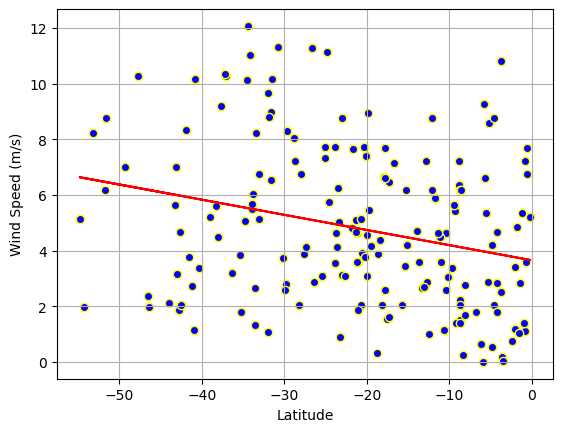

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "blue", edgecolors="yellow")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** 
In the northern hemisphere the r-value is almost unmeasurable and well below anything showing a relationship, however, in the southern hemishpere the r-value is above 0.05 which shows a statistical correlation. I would conclude that more data is needed to produce accurate results as to the relationship between wind speed and latitude.